In [6]:
import pandas as pd
data= pd.read_csv("train.csv")
#將時間還有變形量移除
data2= pd.read_csv("train.csv",usecols=[1,2,3,4,5,6,7,8,9,10,11,13])
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# to make this notebook's output identical at every run
np.random.seed(5)
x=data2
y=data.Deformation
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [7]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=335,criterion='mse', max_depth=15, min_samples_split=2, min_samples_leaf=5, max_features=12, random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, max_features=12, min_samples_leaf=5,
                      n_estimators=335, random_state=42)

In [8]:
predict=model.fit(x_train,y_train).predict(x_test)
predict

array([12.49983633, 13.91697478, 10.64644618, ..., 10.28300564,
       21.52816776, 12.08717016])

In [9]:
from sklearn.metrics import confusion_matrix
confusionmatrix = confusion_matrix(y_test, predict)
confusionmatrix

ValueError: continuous is not supported

In [195]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test,predict))
print(rmse)

0.25000646633111634


<function matplotlib.pyplot.show(*args, **kw)>

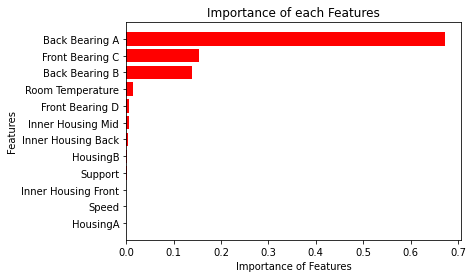

In [196]:
imp=model.feature_importances_
imp
import matplotlib.pyplot as plt
%matplotlib inline
names=data2.columns
zip(imp,names)
imp,names=zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)),imp,align='center',color="red")
plt.yticks(range(len(names)),names)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of each Features')
plt.show

In [197]:
model.score(x_test,y_test)

0.9971529555020153

In [198]:
model.score(x_train,y_train)

0.9989568575493473

In [199]:
data3= pd.read_csv("Data_random_22.csv")
data4= pd.read_csv("Data_random_22.csv",usecols=[1,2,3,4,5,6,7,8,9,10,11,13])
x_2=data4
y_2=data3.Deformation

In [222]:
y_2

0       -0.09825
1        0.05750
2        1.09700
3        3.97645
4        4.09850
          ...   
6622    22.90760
6623    22.90120
6624    22.97635
6625    23.01570
6626    23.03565
Name: Deformation, Length: 6627, dtype: float64

In [200]:
#6.5743
X_new =[x_2.iloc[0,:]]  # Cyprus' GDP per capita
print(model.predict(X_new))

[0.16965824]


In [201]:
from sklearn.ensemble import RandomForestRegressor
predict_df=[]
model=RandomForestRegressor(n_estimators=335,criterion='mse', max_depth=15, min_samples_split=2, min_samples_leaf=5, max_features=12, random_state=42)
model.fit(x_train,y_train)
for m in range(0, len(x_2)):
    X_new = [x_2.iloc[m,:]]
    predict_df.append(model.predict(X_new))

In [203]:
import pandas as pd

#產出CSV檔                
def OutputCSV():   
    Result ='C://Users/User/Desktop/pr.csv'
    df_SAMPLE = pd.DataFrame.from_dict( predict_df )
    df_SAMPLE.to_csv( Result  , index=False )
    print( '成功產出'+Result )

In [204]:
OutputCSV()

成功產出C://Users/User/Desktop/pr.csv
